In [1]:
# Import Libraries
import torch
from torch import nn
import matplotlib.pyplot as plt 

In [2]:
# Display torch version
print(torch.__version__)

2.5.0.dev20240708


In [3]:
# Setup device foe device agnostic code
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = "cpu"
print(f"Using device = {device}")

Using device = mps


In [4]:
# Create a simple linear dataset for univariate regression
m = 0.7
c = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = m*X+c

print("Shape of X = ",X.shape)
print("Shape of y = ", y.shape)
print("Type of X = ",type(X))
print("Type of y = ",type(y))

Shape of X =  torch.Size([50, 1])
Shape of y =  torch.Size([50, 1])
Type of X =  <class 'torch.Tensor'>
Type of y =  <class 'torch.Tensor'>


In [5]:
# Manual Split Logic
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1])
torch.Size([10, 1]) torch.Size([10, 1])


In [6]:
# Same function as before
def plot_data(X_train=X_train, y_train=y_train, X_test = X_test, y_test = y_test, predictions=None):

    plt.figure(figsize=(8,6))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('X vs Y')
    plt.scatter(X_train, y_train, c='b', s=8, label='Training Data')
    plt.scatter(X_test, y_test, c='r', s=8, label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=8, label='Predicted Data')

    plt.legend()

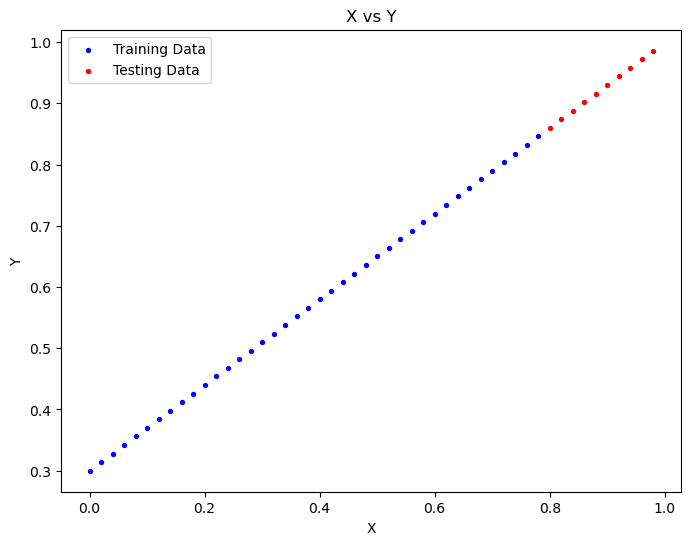

In [7]:
# Call the function
plot_data()

In [8]:
# Define your class
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float, requires_grad=True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights*x + self.bias

In [9]:
# Instantiate the class
torch.manual_seed(42)
model_0 = FirstNeuralNetwork()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

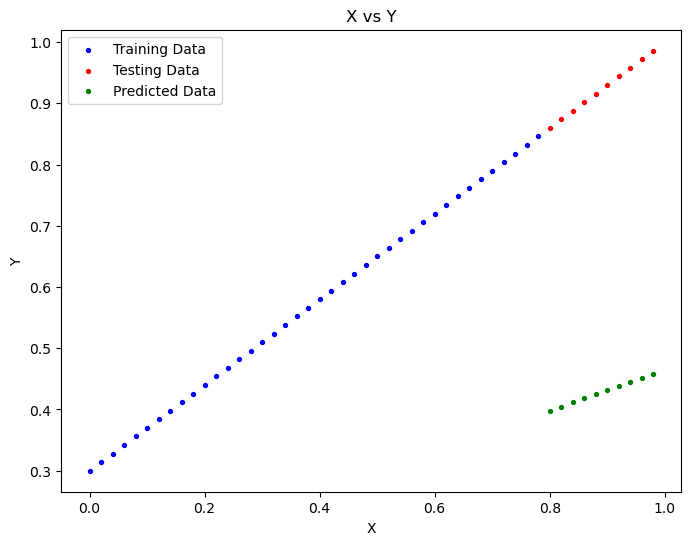

In [10]:
# Get Predictions
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_data(predictions=y_preds)

In [11]:
# Setup loss function and optimizer
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(
    params = model_0.parameters(),
    lr = 0.1
)

In [12]:
# Cast the model to the device
model_0.to(device)

FirstNeuralNetwork()

In [13]:
# Set up a Training Loop
epochs = 500
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
trainLossList = []
testLossList = []
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward Pass
    train_preds = model_0(X_train)

    # 2. Compute Training Loss
    train_loss = loss_fn(y_train, train_preds) 

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Backpropagate Loss
    train_loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fn(y_test, test_preds)

    if epoch%10 == 0:
        print(f"Epoch: {epoch}| Train Loss: {train_loss:.5f}| Test Loss: {test_loss:.5f}")

    trainLossList.append(train_loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())


Epoch: 0| Train Loss: 0.10493| Test Loss: 0.16585
Epoch: 10| Train Loss: 0.00334| Test Loss: 0.01702
Epoch: 20| Train Loss: 0.00234| Test Loss: 0.01036
Epoch: 30| Train Loss: 0.00195| Test Loss: 0.00839
Epoch: 40| Train Loss: 0.00162| Test Loss: 0.00696
Epoch: 50| Train Loss: 0.00135| Test Loss: 0.00578
Epoch: 60| Train Loss: 0.00112| Test Loss: 0.00481
Epoch: 70| Train Loss: 0.00093| Test Loss: 0.00400
Epoch: 80| Train Loss: 0.00077| Test Loss: 0.00332
Epoch: 90| Train Loss: 0.00064| Test Loss: 0.00276
Epoch: 100| Train Loss: 0.00053| Test Loss: 0.00230
Epoch: 110| Train Loss: 0.00044| Test Loss: 0.00191
Epoch: 120| Train Loss: 0.00037| Test Loss: 0.00159
Epoch: 130| Train Loss: 0.00031| Test Loss: 0.00132
Epoch: 140| Train Loss: 0.00026| Test Loss: 0.00110
Epoch: 150| Train Loss: 0.00021| Test Loss: 0.00091
Epoch: 160| Train Loss: 0.00018| Test Loss: 0.00076
Epoch: 170| Train Loss: 0.00015| Test Loss: 0.00063
Epoch: 180| Train Loss: 0.00012| Test Loss: 0.00052
Epoch: 190| Train Loss:

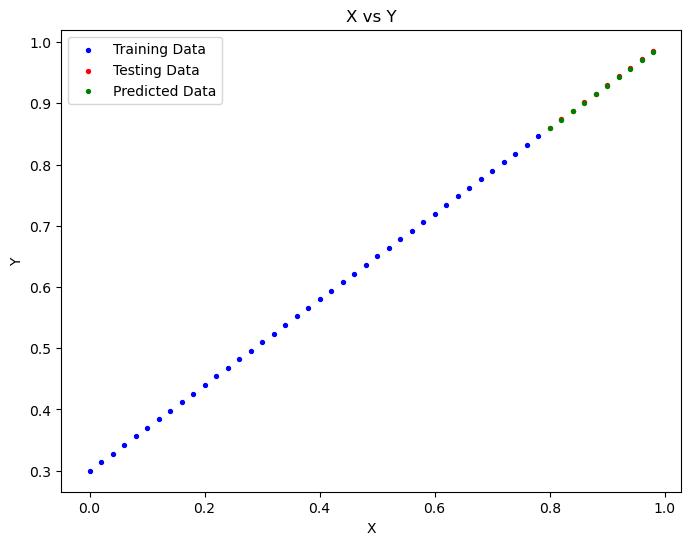

In [14]:
with torch.inference_mode():
    y_preds = model_0(X_test)

plot_data(predictions=y_preds.cpu())

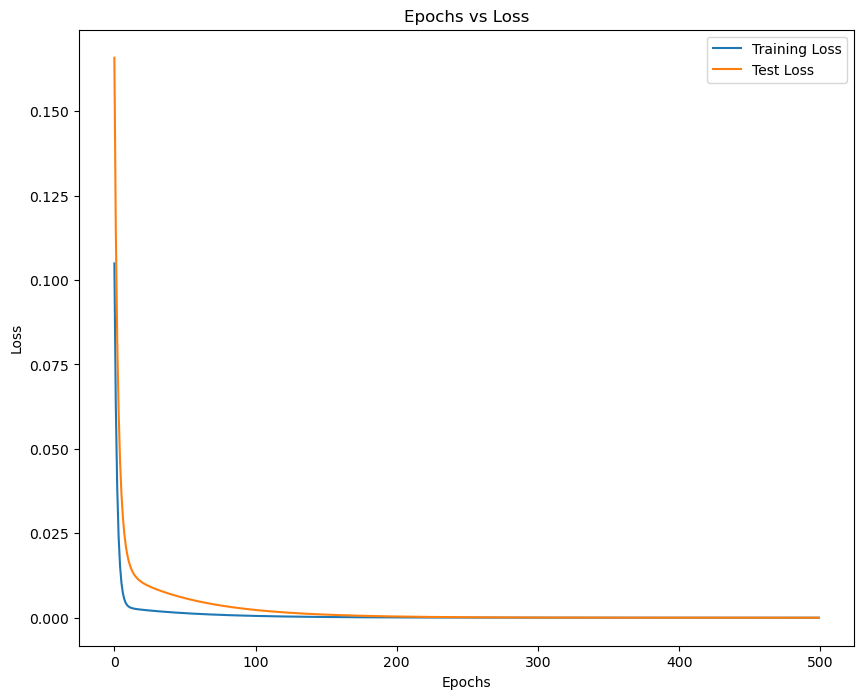

In [15]:
# Plot Loss Curve
plt.figure(figsize=(10,8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend();